# Binary Logistic Regression

### What it is?
Binary Logistic Regression (strange name given that) is a supervised classification Machine Learning algorithm. It is used to predict discrete outputs, in contrast to Linear Regression that can predict continuous outputs. The term binary refers to the fact that it can differentiate between two discrete labels, which are usually 0 and 1.

It can be seen as the next step after linear regression since this method consists of squashing the output of the linear regression with the use of the logistic sigmoid function, which is a probabilistic function whose domain goes from 0 to 1. ![Logistic Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png)

The output of the logistic function is a continue value that indicates the probability of the input $x \in \mathbb{R}^n$ to be in the class 1, $p(y = 1 \mid x)$, and because the probability of both classes must add up to 1, we only have to specify the probability of one class.

###  General explanation of notebook
The structure of the notebook is getting all the data and process it to standarize it, in addition with a simple visualization. Later, we will use the scikit-learn library implementation of Logistic Regression. Finally, we will go through the mathematical explanation and implement it from scratch to compare it.

### 1.  Getting the data
irst of all, we have to import all of the dependencies that we will use to retrieve the data, clean it and also visualize it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "../datasets/DummyLogistic/Data-L-Reg-Gradient-Descent.csv"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, na_values= ['?'])
features = df.columns

print("Non estandarized data")
df.head()

Non estandarized data


,x1,x2,y,X1plusX2
0,89.946963,72.091781,1,162.038744
1,77.111425,75.206589,1,152.318014
2,71.854053,80.549965,1,152.404018
3,67.182350,97.026782,1,164.209131
4,71.087755,71.098405,1,142.186160


We will use only the first two features, x1 and x2, as the attributes of $x$ and $y$ as the target ouput.

In [3]:
X = df.as_matrix()[:, 0:2]
Y = df.as_matrix()[:, 2]

For gaining a better understanding of the data, and given that it is only 2-D, we can plot it as two different groups depending on the class.

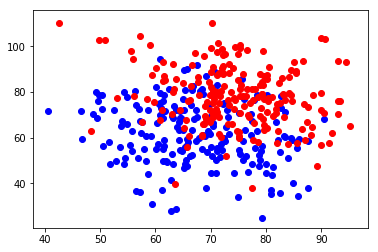

In [4]:
%matplotlib inline
plt.scatter(df.loc[df['y'] == 0]['x1'], df.loc[df['y'] == 0]['x2'], color='b', label='0')
plt.scatter(df.loc[df['y'] == 1]['x1'], df.loc[df['y'] == 1]['x2'], color='r', label='1')

Although it's not extremely clear the separation, it can be estimated. Now, we're going to standarize the attributes to improve the accuracy of the models. After that, we can plot it again to see how it has changed.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

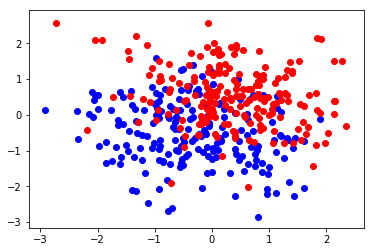

In [6]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='b', label='0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='r', label='1')

The last step is to split the dataset into training and test (we we'll have to tweak a little bit the output so they are column vectors).

In [7]:
X_train = X[:350, :]
Y_train = Y[:350].astype(int).reshape((350,1))
X_test = X[350:, :]
Y_test = Y[350:].astype(int).reshape((50,1))

In [8]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((350, 2), (350, 1), (50, 2), (50, 1))

### 2. Logistic Regression with Scikit-Learn
Scikit-learn is a very powerful library for ML but it's also extremely easy to use. Here, with a few lines we are going to use the Logistic Regression model. We are also going to use the accuracy_score function to see how good is the model.

In [9]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, Y_train.ravel()) #.ravel() it's not mandatory, but it prevents a warning because of the shape of 
                                    # the vector.

Y_pred = logreg.predict(X_test)

accuracy_score(Y_test.ravel(), Y_pred)

0.78

As we can see, we don't even need to understand what it does, with just 3 lines we have used a Logistic Regression model that achieves a not low score accuracy of 78%. Even though it's quite good, maybe if we implement it ourselves understanding the theory behind, we can increase the accuracy.

### 3. Logistic Regression implementation explained
Although in the introduction we have seen an overview of the algorithm, here we're going to explain and implement it from scratch.

First, we have to understand that Logistic Regression is a supervised classification algorithm. The supervised term means that the dataset is composed of the input (attributes), $x \in \mathbb{R}^n$, and the output (labels), $y \in \mathbb{R}$, and the objective is to implement an algorithm whose output prediction, $\hat{y} \in \mathbb{R}$, is as similar as possible to the label.

This problem can be solved from a probabilistic perspective in which the supervised algorithm is based on estimating the probability distribution $p(y \mid x)$. We can do this by using the maximum likelihood estimation to find the best parameter $\theta \in \mathbb{R}^n$ for a family of distributions $p(y \mid x; \theta)$. 

Since we are trying to classify between two classes, hence the binary term, the distribution must be over a binary value. For that reason the logistic sigmoid function was chosen because, as it's been said before, we can squash the output of the linear regression into the range (0,1) and interpret this as a probability. More exactly as the probability $p(y = 1 \mid x)$, and because we only have two classes whose probabilities must add up to 1, the probabity of x being the class 0 is $p(y = 0 \mid x) = 1 - p(y=1 \mid x)$.

The formula for the logistic softmax function is: $\sigma(z) = \frac{1}{1+e^{-z}}$, also known as sigmoid function.

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

But this is not all because we have to define what is the input to this function. As we have said before, it's the output of the linear regression, which in short is $z = \theta^\top x$ (a further explanation in [Linear Regression Tutorial](2_LinearRegression.ipynb)). In the end, our probability prediction will be: $h_\theta(x) = \sigma(z) = \sigma(\theta^\top x)$

In [11]:
def logisticRegression(X, theta):
    return sigmoid(X@theta)

After computing the probability of $(y=1 \mid x)$, the last step is to set a treshold which we'll use to obtain the class of $x$ from the probability. This is usually chosen to be $0.5$, but it can be changed. With this, the model prediction is complete and with the proper values of $\theta$, we could predict the class $y$ of a given input $x$. 

Nevertheless, these values are unknown and to calculate them a process called training is required. For that, and following the probabilistic perspective, we must search for them by maximizing the log-likelihood, or minimizing the negative log-likelihood. This can be done by using the technique of Gradient Descent.

But first, let's derive the cost function from the process of maximizing the log-likelihood and for that, we have to define the probabilistic distribution from which the data is sampled. Since there are only two classes, the [Bernouilli Distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) fits perfectly and is defined by $f(k; p) = \begin{cases}p, & \text{if k = 1}\\1-p, & \text{if k = 0}\end{cases}$ or $f(k; p) = p^k(1-p)^{1-k}$.

Changing the name of the letters to our case, and knowing that our prediction $\hat{y} = p(y = 1\mid x)$, or probability is $p(y\mid x) = \hat{y}^y(1-\hat{y})^{1-y}$. 

If we take the likelihood of this probability distribution: $\mathcal{L}(y, \hat{y}) = \prod_{i=1}^n f(y, \hat{y}) = \prod_{i=1}^n \hat{y}^y(1-\hat{y})^{1-y}$. By taking the logarithm, we obtain the log-likelihood: $log \mathcal{L} = log(\prod_{i=1}^n \hat{y}^y(1-\hat{y})) = \sum_{i=1}^n log(\hat{y}^y)+log((1-\hat{y})^1-y) = \sum_{i=1} ylog(\hat{y})+(1-y)log(1-\hat{y})$.

This is the log-likelihood formula, now is just a matter of adding a constant, $\frac{1}{m}$ being $m$ the number of samples and adding a $-$ because of the negative log-likelihodd. Now, all that's left is implement it in a vectorized way and we have our cost function.

In [12]:
def costFunction(X, Y, theta):
    z = X@theta
    h = sigmoid(z)
    return (1/X.shape[0])*(-Y.T@np.log(h)-(1-Y).T@np.log(1-h))

A little intuition behind this cost function:
It can be broken into two different functions depending if the class is 1 or 0, $Cost Function = J(\theta) =  \begin{cases}-log(\hat{y}), & \text{if y = 1}\\-log(1-\hat{y}), & \text{if y = 0}\end{cases}$. If we plot this two functions, we see that if the class is 1 and the predicted class (probability) is close to 0, the cost is high and viceversa. ![Cost Function](http://ml-cheatsheet.readthedocs.io/en/latest/_images/y1andy2_logistic_function.png).

After calculating the cost function, the next step is implement an algorithm to decrease the cost. In order to do this, we're going to use the popular Gradien Descent, already explained in the [Linear Regression Tutorial](2_LinearRegression.ipynb). Nevertheless, the pseudocode for the algorithm is ![Gradient Descent Pseudocode](https://cdn-images-1.medium.com/max/1040/1*oJKalifbWzwuo3fRjWJjTg.png). 

So, the next step is to calculate the gradient of the cost function with respect to the weights parameters $\theta$, but before deriving, let's clarify some terms:
$\hat{y} = h_\theta(x) = p(y = 1 \mid x, \theta) = \frac{1}{1+e^{-\theta^\top x}}$.
<br>
$\text{cost function} = J(\theta) = \sum_{i=1} ylog(\hat{y})+(1-y)log(1-\hat{y})$.

Just by manipulating this last expression:
Consider $ log(\hat{y}) = log(\frac{1}{1+e^{-\theta^\top x}}) = -log(1+e^{-\theta^\top x})$ and $log(1-\hat{y}) = log(1-\frac{1}{1+e^{-\theta^\top x}}) = log(\frac{e^{-\theta^\top x}}{1+e^{-\theta^\top x}}) = log(e^{-\theta^\top x})-log(1+e^{\theta^\top x}) = -\theta^\top x - log(1+e^{\theta^\top x})$.

<br>
Plugging in the two simplified expressions above, we obtain: $J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i})) = -\frac{1}{m}\sum_{i=1}^m -y^i(\log ( 1+e^{-\theta x^i})) + (1-y^i)(-\theta x^i-\log ( 1+e^{-\theta x^i} )) =$
<br> $-\frac{1}{m}\sum_{i=1}^m y_i\theta x^i-\theta x^i-\log(1+e^{-\theta x^i})=-\frac{1}{m}\sum_{i=1}^m y_i\theta x^i-\log(1+e^{\theta x^i})$ where the second equality follows from $-\theta x^i-\log(1+e^{-\theta x^i})=\log e^{\theta x^i}+\log(1+e^{-\theta x^i})=-\log(1+e^{\theta x^i}).$

Now, it's just deriving $\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta}\frac{-1}{m}\sum_{i=1}^m y_i\theta x^i-\log(1+e^{\theta x^i}) = \frac{-1}{m}\sum_{i=1}^m y_i x^i-\frac{e^{\theta x^i}x^i}{1+e^{\theta x^i}} = \frac{-1}{m}\sum_{i=1}^m x^i (y_i - \frac{1}{1+e^{-\theta x^i}}) = \frac{1}{m}\sum_{i=1}^m x^i (\hat{y}_i - y_i)$. 

So the $gradient = \frac{1}{m}\sum_{i=1}^m x^i (\hat{y}_i - y_i)$. The implementation is the vectorized form.

In [13]:
def gradient(X, y, theta, lr):
    z = np.dot(X, theta)
    h = sigmoid(z)
    gradient = (np.dot(X.T, (h - y))) / y.size
    return theta - lr * gradient

This is all the theory behind Logistic Regression, it wasn't so difficult, right? Well, maybe a little harder than Linear Regression. Now, let's see if it truly works. For that, we will implement the Gradient Descent pseudocode and plot the error, so as to see if it gets smaller.

In [14]:
lr = 0.1
theta = np.zeros((X_train.shape[1], 1))

In [15]:
error = []
acc = []
acc_test = []

In [16]:
%%time
for i in range(10000):
    theta = gradient(X_train, Y_train, theta, lr)
    costFunction(X_train, Y_train, theta)
    Y_prob = logisticRegression(X_train, theta) #probabilities
    
    Y_prob[Y_prob >= 0.5] = 1
    Y_prob[Y_prob < 0.5] = 0
    acc.append(accuracy_score(Y_train, Y_prob))
    error.append(costFunction(X_train, Y_train, theta).reshape((1)))
    
    Y_prob = logisticRegression(X_test, theta) #probabilities
    
    Y_prob[Y_prob >= 0.5] = 1
    Y_prob[Y_prob < 0.5] = 0
    acc_test.append(accuracy_score(Y_test, Y_prob))

CPU times: user 4.28 s, sys: 4.3 ms, total: 4.28 s
Wall time: 4.28 s


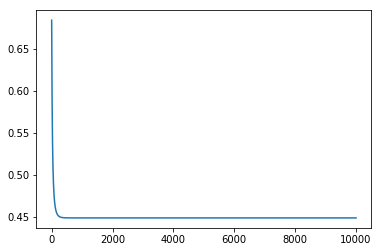

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(error)

As we can see from the plot above, the error decreases rapidly and it gets stuck around 0.45. Let's plot the accuracy over the training and test set to compare it with the scikit-learn implementation.

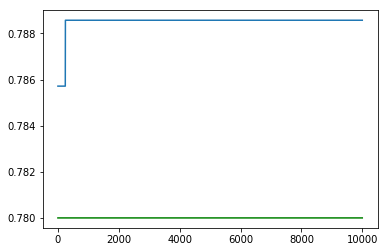

In [18]:
plt.plot(acc_test, color='green')
plt.plot(acc)

Here it happens something strange, the accuracy increases rapidly to approximately 0.786 and after little iterations gets stuck in 0.788. This is possibly due to the limitations of the hypothesis, because is linear, and that's the maximum accuracy it can get.

However, when we compare it with the scikit-learn implementation we see that both achieve the same accuracy on the test set, indicating that it's highly probable that with this model, the maximum accuracy possible in this dataset is 0.788.

### 3.1 Adding regularization
If we plot the theta parameter, we would see that it takes large numbers. This could cause a problem called overfitting, which means that the model has learned so well the training data that it can't generalize and consequently the error on the test data will be worst. In order to fix this, we add to the cost function the squared of the parameters, so the values are the smallest possible.

Now, the cost function is $J(\theta) = \frac{-1}{m}\sum_{i=1} ylog(\hat{y})+(1-y)log(1-\hat{y})+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$

In [19]:
def costFunction_reg(X, Y, theta, lam):
    z = X@theta
    h = sigmoid(z)
    return (1/X.shape[0])*(-Y.T@np.log(h)-(1-Y).T@np.log(1-h)+(lam/2)*theta.T@theta)

And accordingly with the new cost function, the new gradient is $\frac{1}{m}\sum_{i=1}^m x^i (\hat{y}_i - y_i) + \frac{\lambda}{m}\theta$. The implementation is the vectorized form.

In [20]:
def gradient_reg(X, y, theta, lr, lam):
    z = np.dot(X, theta)
    h = sigmoid(z)
    new_theta = theta
    new_theta[0] = 0
    gradient = (np.dot(X.T, (h - y))+lam*new_theta) / y.size
    return theta - lr * gradient

The rest is the same as before, implement the Gradient Descent algorithm and append the results of every iteretion to a list so we can later plot it.

In [47]:
lr_reg = 0.1
lam = 1
theta_reg = np.zeros((X_train.shape[1], 1))

In [48]:
error_reg = []
acc_reg = []
acc_test_reg = []

In [49]:
%%time
for i in range(10000):
    theta = gradient_reg(X_train, Y_train, theta, lr, lam)
    costFunction_reg(X_train, Y_train, theta, lam)
    Y_prob = logisticRegression(X_train, theta) #probabilities
    
    Y_prob[Y_prob >= 0.5] = 1
    Y_prob[Y_prob < 0.5] = 0
    acc_reg.append(accuracy_score(Y_train, Y_prob))
    error_reg.append(costFunction(X_train, Y_train, theta).reshape((1)))
    
    Y_prob = logisticRegression(X_test, theta) #probabilities
    
    Y_prob[Y_prob >= 0.5] = 1
    Y_prob[Y_prob < 0.5] = 0
    acc_test_reg.append(accuracy_score(Y_test, Y_prob))

CPU times: user 5.02 s, sys: 7.97 ms, total: 5.02 s
Wall time: 5.04 s


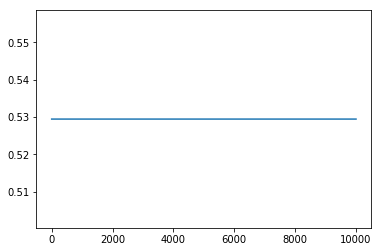

In [50]:
plt.plot(error_reg)

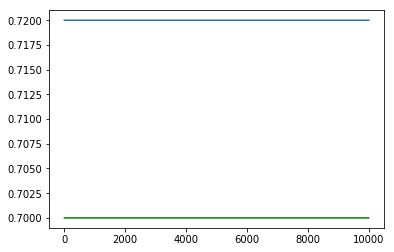

In [51]:
plt.plot(acc_test_reg, color='green')
plt.plot(acc_reg)

Curiously, the test accuracy of the model with the regularization is worst than the normal implementation. This means that the model hadn't overfitted the dataset. Nevertheless, with other dataset if the accuracy on the test dataset is far worse than the training dataset, overfiting may be the cause and adding regularization the solution. At least now, you now how to implement it.

Reference:
1. https://github.com/martinpella/logistic-reg/blob/master/logistic_reg.ipynb
2. https://www.kaggle.com/emilyhorsman/basic-logistic-regression-with-numpy
3. http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
4. https://www.statlect.com/fundamentals-of-statistics/classification-models
5. https://www.statlect.com/fundamentals-of-statistics/logistic-model-maximum-likelihood
6. https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression
7. http://thegrandjanitor.com/2015/08/20/gradient-descent-for-logistic-regression/
8. http://ucanalytics.com/blogs/gradient-descent-logistic-regression-simplified-step-step-visual-guide/
9. https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
10. [Deep Learning Book by Ian Goodfellow and Yoshua Bengio and Aaron Courville](https://www.deeplearningbook.org/)
11. [Coursera - Machine Learning](https://www.coursera.org/learn/machine-learning)